# Business problem

In [2]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Data Exploration

In [3]:
# Import data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Outliers/

In [6]:
# Explore Categorical Columns
cat_cols = [c for c in df. columns if df[c].dtype == 'object']
df[cat_cols].describe()

,date,waterfront,view,condition,grade,sqft_basement
count,21597,19221,21534,21597,21597,21597
unique,372,2,5,5,11,304
top,6/23/2014,NO,NONE,Average,7 Average,0.0
freq,142,19075,19422,14020,8974,12826


waterfront, view has null values

In [7]:
# Check nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Train Test Split

In [9]:
X = df.drop(columns= ['id','price'])
y = df['price']

In [10]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [11]:
print('X_train:')
display(X_train.describe())
print('X_test:')
display(X_test.describe())

X_train:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15117.000000,15117.000000,15117.000000,1.511700e+04,15117.000000,15117.000000,15117.000000,12418.000000,15117.00000,15117.000000,15117.000000,15117.000000,15117.000000
mean,3.376001,2.119948,2087.040617,1.516938e+04,1.496362,1793.521598,1971.090825,82.781285,98078.17907,47.560889,-122.213841,1990.058610,12854.456043
std,0.909173,0.770233,922.643607,4.106372e+04,0.540947,830.319679,29.339641,398.004042,53.58806,0.138218,0.141493,686.935438,27118.169894
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1430.000000,5.070000e+03,1.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471800,-122.329000,1490.000000,5102.000000
50%,3.000000,2.250000,1912.000000,7.623000e+03,1.500000,1570.000000,1975.000000,0.000000,98065.00000,47.573200,-122.231000,1840.000000,7625.000000
75%,4.000000,2.500000,2560.000000,1.075400e+04,2.000000,2230.000000,1997.000000,0.000000,98118.00000,47.678300,-122.125000,2360.000000,10088.000000
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


X_test:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6480.000000,6480.000000,6480.000000,6.480000e+03,6480.000000,6480.000000,6480.000000,5337.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000
mean,3.366667,2.106211,2064.647840,1.493618e+04,1.488812,1777.108025,1970.787037,85.627319,98077.421759,47.558235,-122.214313,1978.599228,12533.925463
std,0.965111,0.766037,907.309873,4.221816e+04,0.536726,821.705862,29.459273,404.460305,53.338089,0.139321,0.138922,681.221783,27636.376894
min,1.000000,0.750000,410.000000,6.090000e+02,1.000000,410.000000,1900.000000,0.000000,98001.000000,47.162200,-122.515000,670.000000,659.000000
25%,3.000000,1.500000,1420.000000,5.001000e+03,1.000000,1190.000000,1951.000000,0.000000,98032.750000,47.469275,-122.327000,1480.000000,5068.250000
50%,3.000000,2.250000,1910.000000,7.590000e+03,1.500000,1550.000000,1975.000000,0.000000,98065.000000,47.569600,-122.229000,1830.000000,7610.000000
75%,4.000000,2.500000,2510.000000,1.050000e+04,2.000000,2190.000000,1996.000000,0.000000,98117.000000,47.677525,-122.126000,2360.000000,10075.750000
max,33.000000,7.750000,10040.000000,1.164794e+06,3.500000,8860.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.315000,5790.000000,858132.000000


# Data Preparation

Depends on our Business Problem. For example, if our stakeholder is the single family whose trying to buy house, bedrooms > 6  usually is not single family house

In [16]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
753,8/28/2014,2,2.50,2380,6600,1.0,NaN,NONE,Average,8 Good,2380,0.0,2010,NaN,98053,47.7170,-122.020,1870,6600
1418,4/15/2015,4,3.75,3190,17186,2.0,YES,EXCELLENT,Average,10 Very Good,3190,0.0,1999,0.0,98178,47.5115,-122.246,2290,13496
8178,9/3/2014,3,2.50,1730,6930,2.0,NO,NONE,Average,8 Good,1730,0.0,1994,0.0,98003,47.2621,-122.308,1780,6930
2254,11/12/2014,4,2.00,1870,8750,1.0,NO,AVERAGE,Average,7 Average,1870,0.0,1977,0.0,98022,47.1985,-122.001,1770,8207
4063,2/19/2015,8,3.00,2850,12714,1.0,NaN,NONE,Average,7 Average,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,Average,7 Average,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
21575,10/2/2014,4,2.75,2770,3852,2.0,NO,NONE,Average,8 Good,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641
5390,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,Good,6 Low Average,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500
860,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,Average,5 Fair,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000


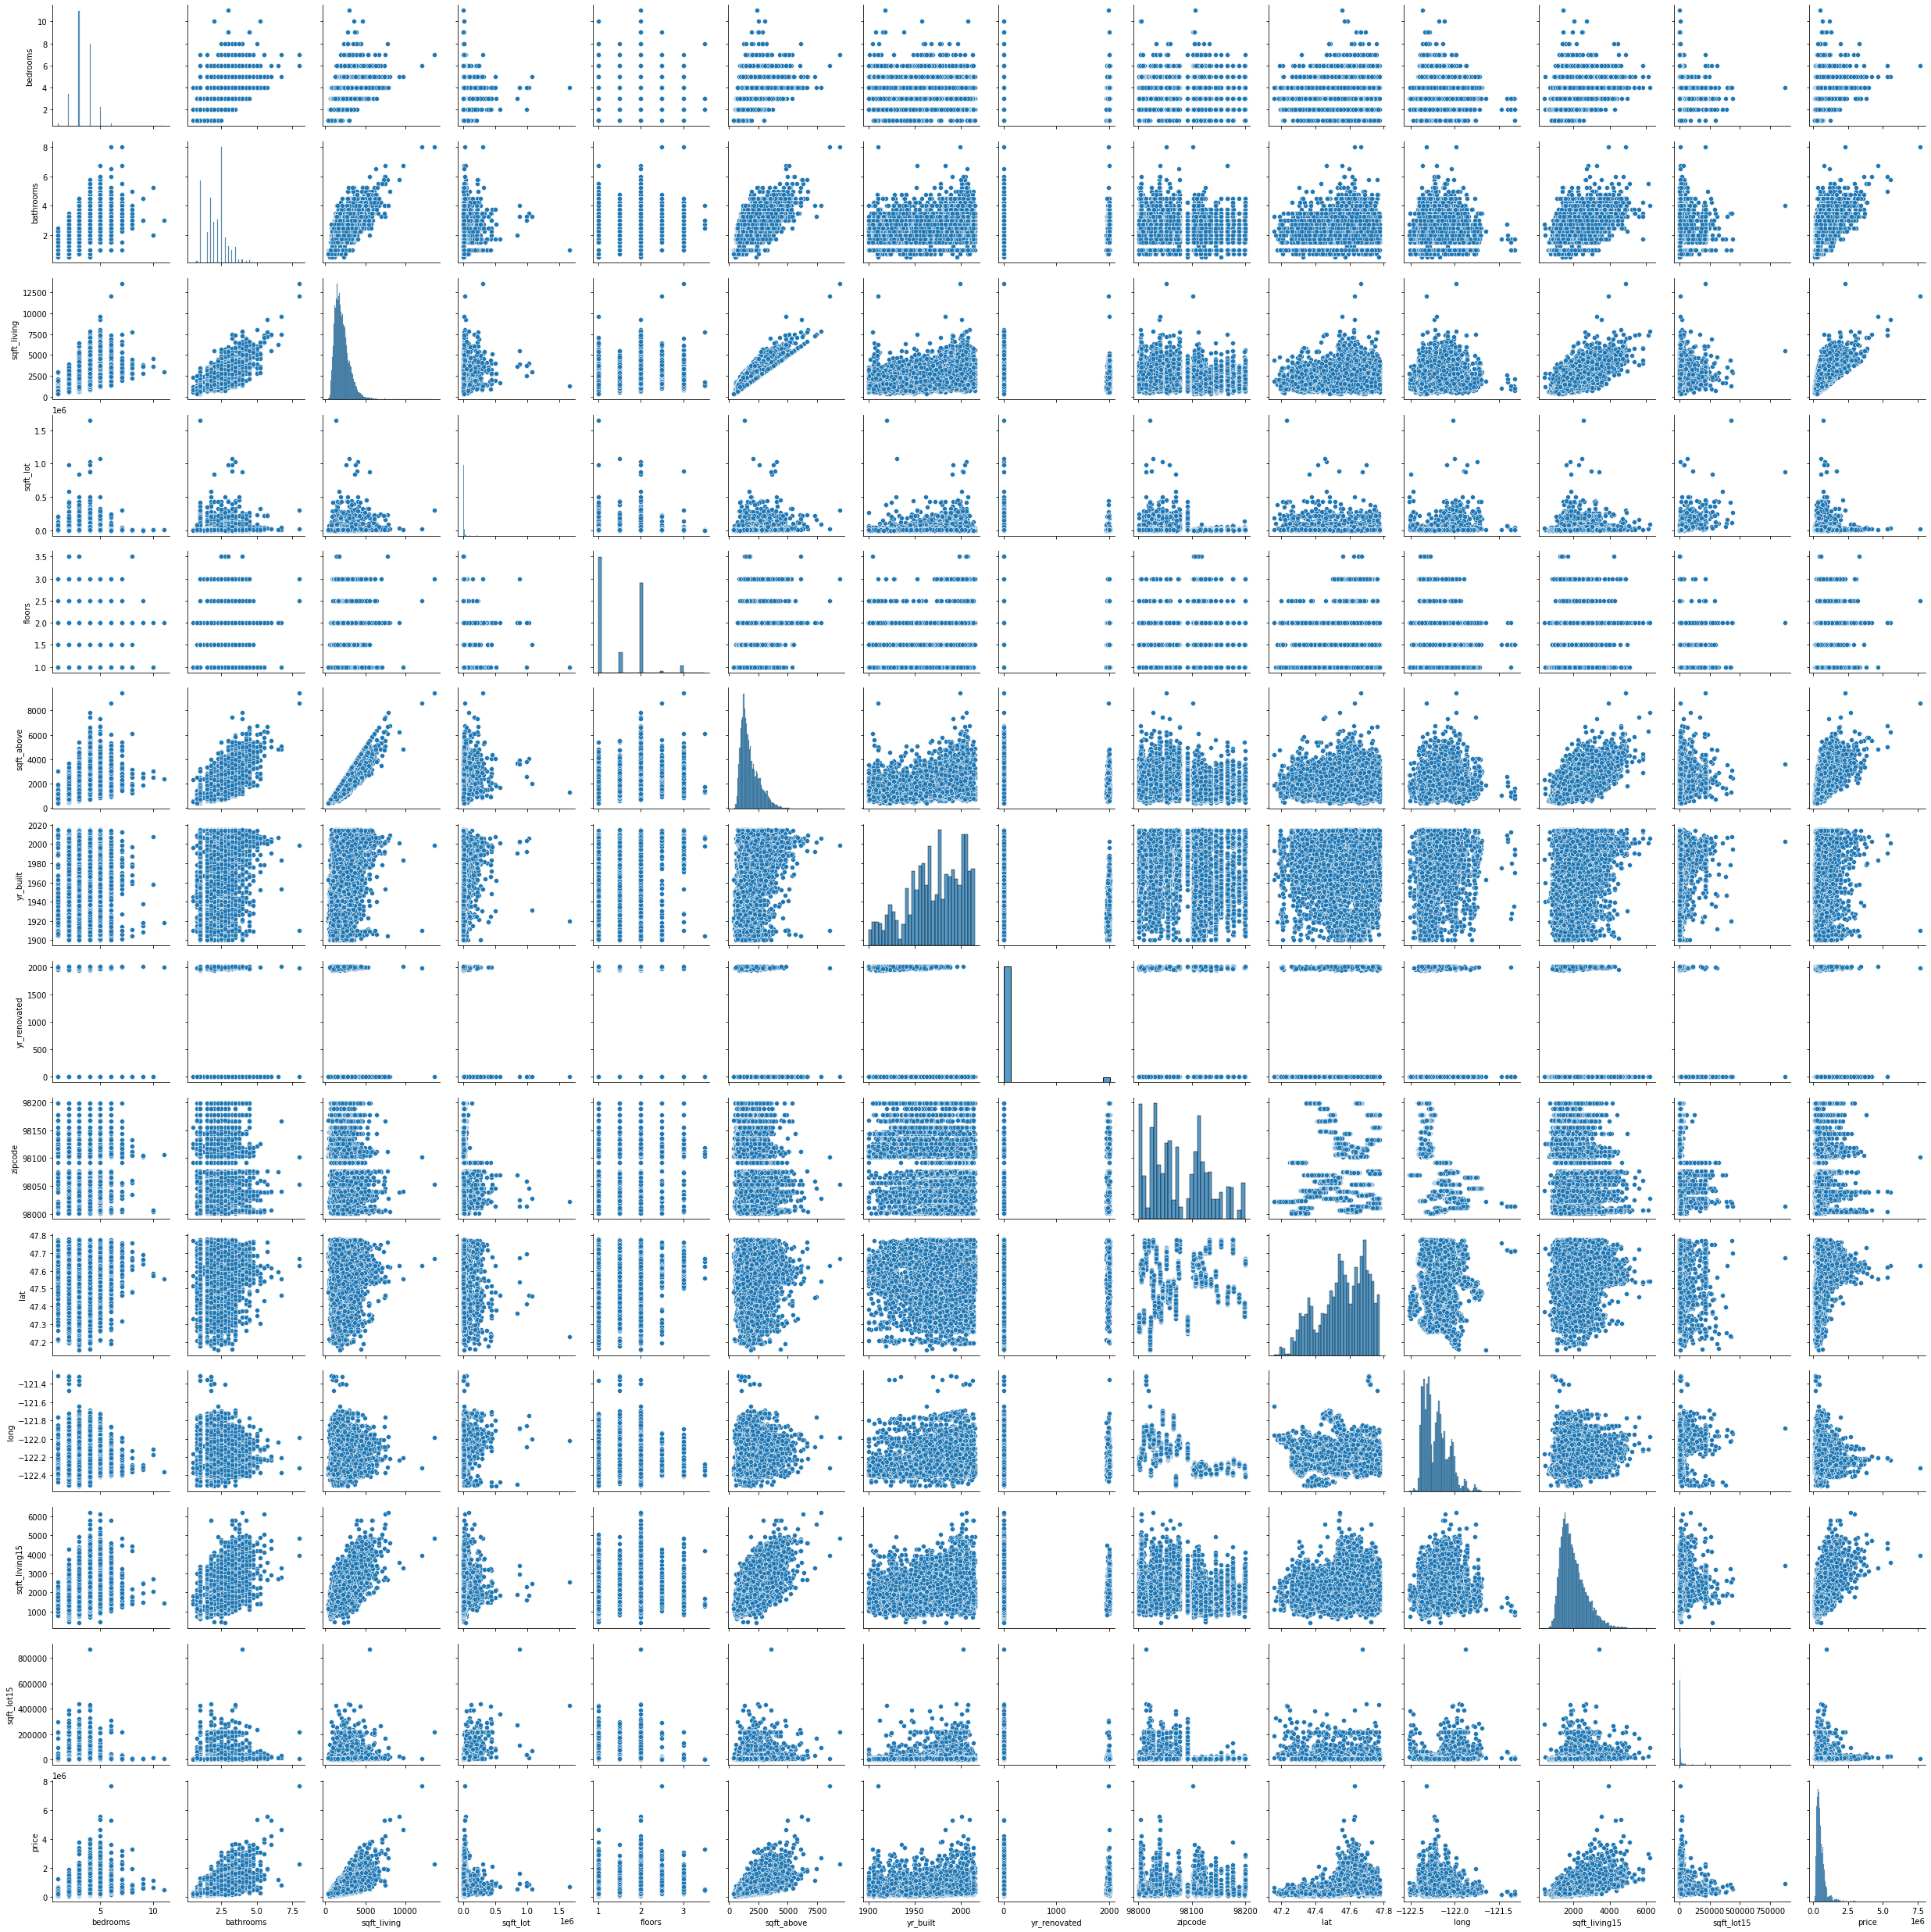

In [19]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.pairplot(train_df)

Lots of histograms are skewed. There are two options:
- Log transformation
- Eliminate outlier

In [32]:
used_cols = [c for c in df.columns if c not in ['price', 'id', *cat_cols]]
num_cols = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]

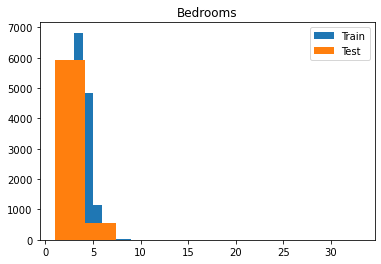

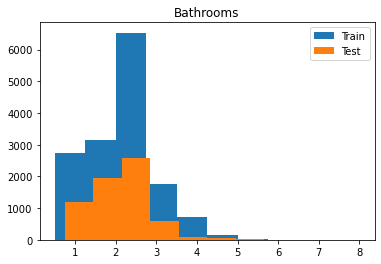

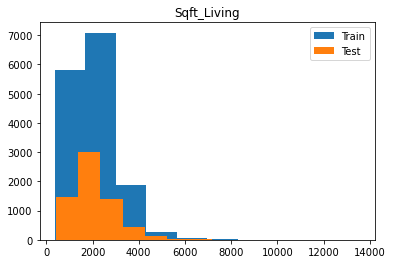

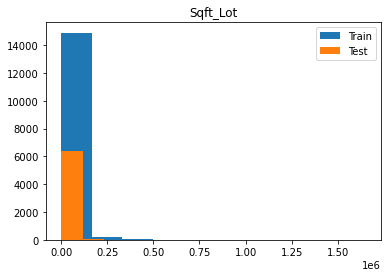

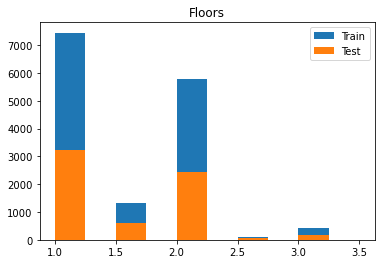

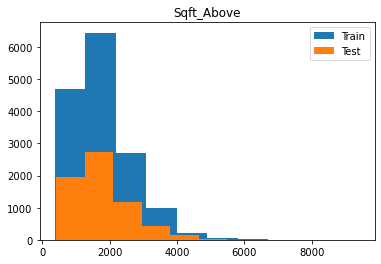

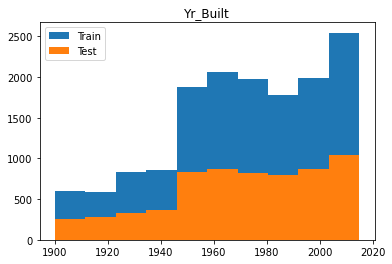

C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Paul\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


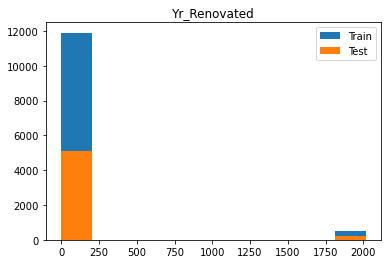

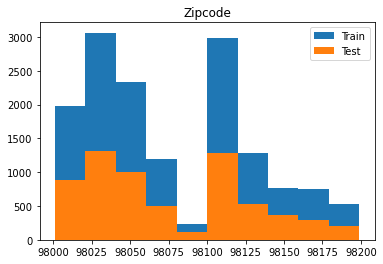

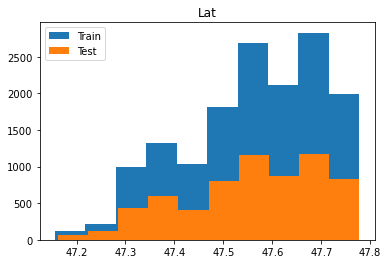

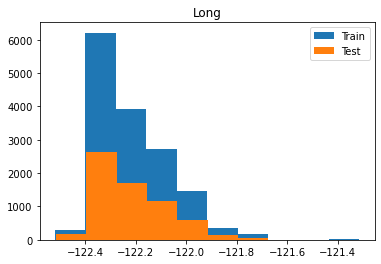

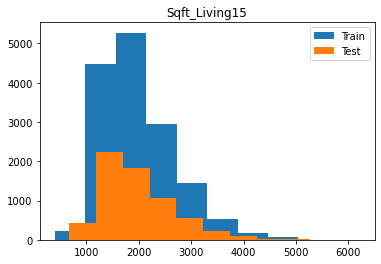

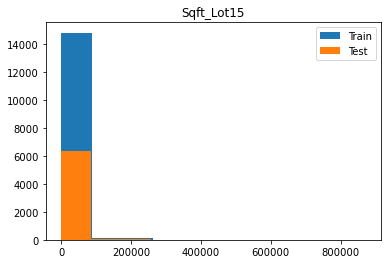

In [33]:
for col in used_cols:
    plt.hist(X_train[col], label= 'Train')
    plt.hist(X_test[col], label = 'Test')
    plt.title(f'{col.title()}')
    plt.legend()
    plt.show()

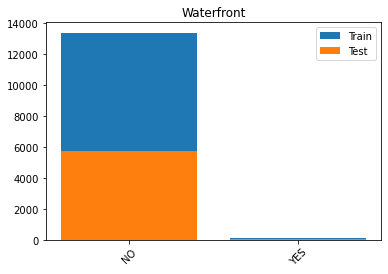

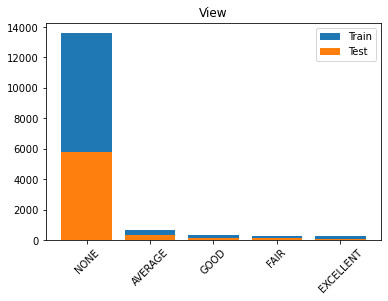

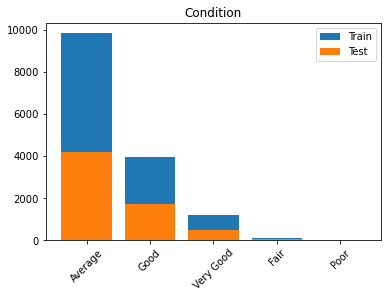

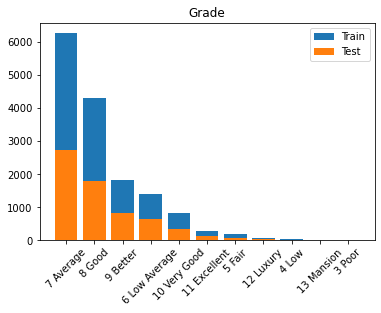

In [39]:
used_cols = [c for c in cat_cols if df[c].nunique() < 15]
for col in used_cols:
    train_values = X_train[col].value_counts()
    test_values = X_test[col].value_counts()
    plt.bar(train_values.index, train_values, label= 'Train')
    plt.bar(test_values.index, test_values, label = 'Test')
    plt.title(f'{col.title()}')
    plt.xticks(rotation= 45)
    plt.legend()
    plt.show()

<AxesSubplot:>

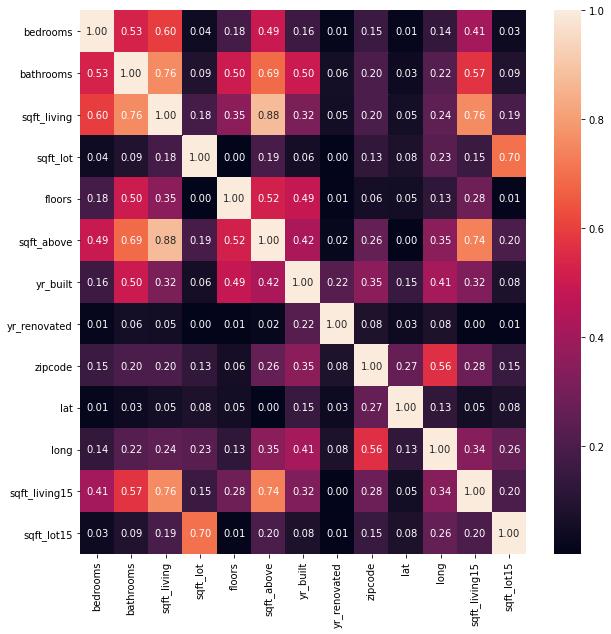

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

Several high multicollinearity 

<AxesSubplot:>

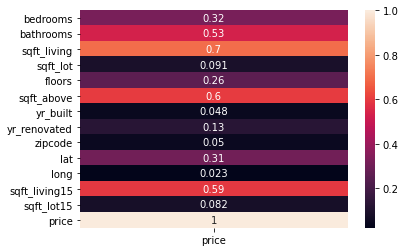

In [23]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(train_df.corr()[['price']].abs(),annot=True)

Single => sqft_living 

# Baseline Understanding

In [24]:
# Define function that evaluate the amount of error between model's predication and the actual values for both train and test set
def evaluate(y_tr, tr_preds, y_te, te_preds):
    '''
    Evaluate the amount of error between model's predication and the actual values for both train and test set
    
    Inputs:
    y_tr = array like, actual values for 'price' for my train dataset
    y_te = array like, actaul values for 'price' for my test dataset
    tr_preds = array like, predicted values for 'price' for my train dataset
    te_preds = array like, predicted values for 'price' for my test dataset
    '''
    
    print(f'Train R2: {r2_score(y_tr, tr_preds)}')
    print(f'Test R2: {r2_score(y_te, te_preds)}')
    print('****')
    print(f'Train RMSE: {mean_squared_error(y_tr, tr_preds,squared = False)}')
    print(f'Test RMSE: {mean_squared_error(y_te, te_preds,squared=False)}')
    print('****')
    print(f'Train MAE: {mean_absolute_error(y_tr, tr_preds)}')
    print(f'Test MAE: {mean_absolute_error(y_te, te_preds)}')
    
    # Calculate Residual
    train_residuals = y_tr-tr_preds
    test_residuals = y_te-te_preds
    
    # Display Scatter Plot for Residual
    plt.scatter(tr_preds, train_residuals, label='Train')
    plt.scatter(te_preds, test_residuals, label='Test')
    plt.axhline(y=0, color='red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.show()

In [25]:
train_target_mean = y_train.mean()
train_target_mean

542036.6354435404

In [26]:
baseline_train_preds = [train_target_mean] * len(y_train)

baseline_test_preds = [train_target_mean] * len(y_test)

baseline_train_preds

[542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,


Train R2: 0.0
Test R2: -0.00025364584938625256
****
Train RMSE: 368717.15420135023
Test RMSE: 364186.90115591313
****
Train MAE: 235842.03996570347
Test MAE: 231347.94071899675


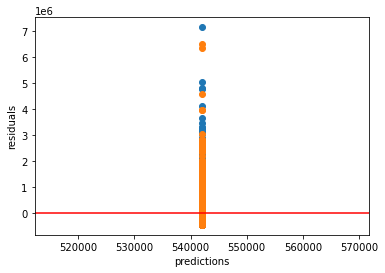

In [27]:
evaluate(y_train,baseline_train_preds,y_test,baseline_test_preds)

## Model 1.0

In [29]:
m1_X_train = X_train['sqft_living']

model1 = sm.OLS(y_train,sm.add_constant(m1_X_train)).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.465e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:31:57   Log-Likelihood:            -2.1009e+05
No. Observations:               15117   AIC:                         4.202e+05
Df Residuals:                   15115   BIC:                         4.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.311e+04   5285.915     -8.155      0.000   -5.35e+04   -3.27e+04
sqft_living   280.3702      2.316    121.033      0.000     275.830     284.911
==============================================================================
Omnibus:                     9707.719   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267176.166
Skew:                           2.649   Prob(JB):                         0.00
Kurtosis:                      22.902   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
m1_X_test = X_test['sqft_living']
m1_train_preds = model1.predict(sm.add_constant(m1_X_train))
m1_test_preds = model1.predict(sm.add_constant(m1_X_test))

Train R2: 0.4921710977618464
Test R2: 0.4938282899234565
****
Train RMSE: 262755.6421440497
Test RMSE: 259070.63177787367
****
Train MAE: 174832.92860933318
Test MAE: 171179.74561297006


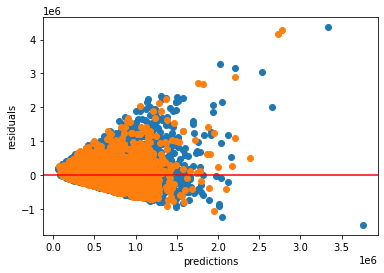

In [31]:
evaluate(y_train,m1_train_preds,y_test,m1_test_preds)